# Explore FMP Financial Data 

In [106]:
# View Source of Python Kernel
!which python

/home/codespace/.python/current/bin/python


In [107]:
# Import Libraries
import matplotlib.pyplot as plt
import pandas as pd
from matplotlib.ticker import MaxNLocator
from sqlalchemy import create_engine

In [108]:
# Create connection engine for the SQLite database
db_path = "/workspaces/FMP-Financial-Data/fin_data.db"
engine = create_engine(f'sqlite:///{db_path}')

In [109]:
# Query the daily_prices data
query = "SELECT * FROM (daily_prices) ORDER BY date ASC LIMIT 5;"
print(pd.read_sql(query, engine))

         date    open    high     low   close  adj_close symbol
0  2020-02-19  108.39  109.25  108.06  108.51     108.51   AMZN
1  2020-02-19  388.12  392.95  384.90  386.19     386.19   NFLX
2  2020-02-20  108.65  108.84  106.37  107.65     107.65   AMZN
3  2020-02-20  386.56  389.70  376.68  386.00     386.00   NFLX
4  2020-02-21  107.11  107.23  104.40  104.80     104.80   AMZN


In [110]:
# Assign daily_prices table to a DataFrame
query = "SELECT * FROM (daily_prices);"
daily_prices_df = pd.read_sql(query, engine)

daily_prices_df['date'] = pd.to_datetime(daily_prices_df['date'])

In [111]:
# Filter data by symbol/ticker
amzn = daily_prices_df[daily_prices_df['symbol'] == 'AMZN']
nflx = daily_prices_df[daily_prices_df['symbol'] == 'NFLX']

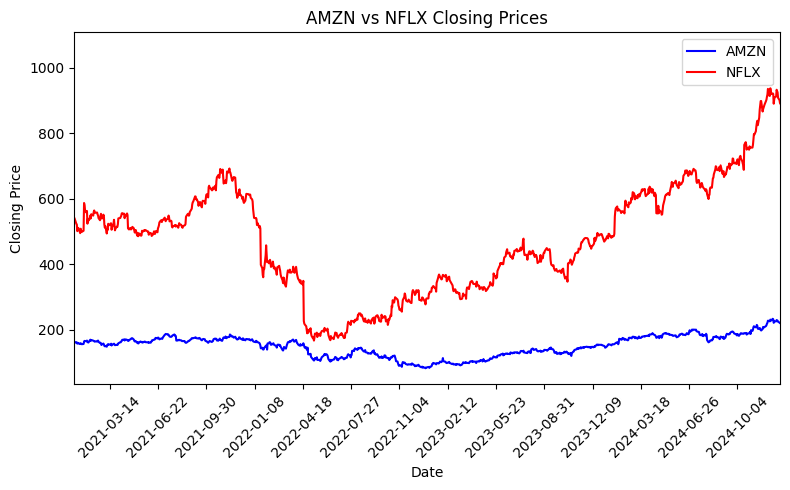

In [120]:
# Plot the data
start_date = '2020-12-31'
end_date = '2024-12-31'

plt.figure(figsize=(8,5))

plt.plot(amzn['date'],amzn['close'],label='AMZN',color='blue')
plt.plot(nflx['date'],nflx['close'],label='NFLX',color='red')

plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.title('AMZN vs NFLX Closing Prices')
plt.legend()
plt.xticks(rotation=45)
plt.xlim(pd.to_datetime(start_date), pd.to_datetime(end_date))
plt.gca().xaxis.set_major_locator(MaxNLocator(integer=True, prune='both', nbins=16))
plt.tight_layout()
plt.show()